# GraphicML Test

## Single Graph

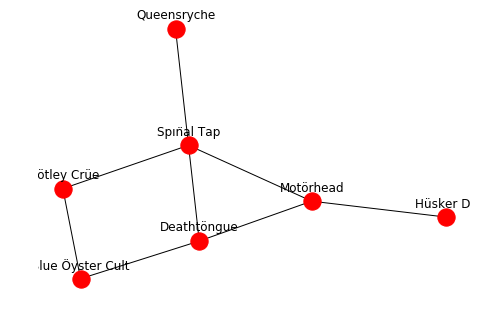

In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

try:
    hd = 'H' + unichr(252) + 'sker D' + unichr(252)
    mh = 'Mot' + unichr(246) + 'rhead'
    mc = 'M' + unichr(246) + 'tley Cr' + unichr(252) + 'e'
    st = 'Sp' + unichr(305) + 'n' + unichr(776) + 'al Tap'
    q = 'Queensr' + unichr(255) + 'che'
    boc = 'Blue ' + unichr(214) + 'yster Cult'
    dt = 'Deatht' + unichr(246) + 'ngue'
except NameError:
    hd = 'H' + chr(252) + 'sker D' + chr(252)
    mh = 'Mot' + chr(246) + 'rhead'
    mc = 'M' + chr(246) + 'tley Cr' + chr(252) + 'e'
    st = 'Sp' + chr(305) + 'n' + chr(776) + 'al Tap'
    q = 'Queensr' + chr(255) + 'che'
    boc = 'Blue ' + chr(214) + 'yster Cult'
    dt = 'Deatht' + chr(246) + 'ngue'

G = nx.Graph()
G.add_edge(hd, mh)
G.add_edge(mc, st)
G.add_edge(boc, mc)
G.add_edge(boc, dt)
G.add_edge(st, dt)
G.add_edge(q, st)
G.add_edge(dt, mh)
G.add_edge(st, mh)

pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=16, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.07
nx.draw_networkx_labels(G, pos)
plt.figure(figsize=(16,9))
plt.show()

In [2]:
import GraphicML

GA = GraphicML.Attribute(G)
df = GA.sigTabular()
df.head()

,source,target,shortest_path_length,efficiency,jaccard_coefficient,resource_allocation_index,adamic_adar_index,preferential_attachment,degree_centrality_x,closeness_centrality_x,...,number_of_edges,number_of_selfloops,graph_number_of_cliques,graph_clique_number,density,transitivity,average_clustering,radius,is_tree,wiener_index
0,Motörhead,Queensrÿche,2,0.5,0.333333,0.250000,0.721348,3,0.5,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
1,Motörhead,Blue Öyster Cult,2,0.5,0.250000,0.333333,0.910239,6,0.5,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
2,Motörhead,Hüsker Dü,1,1.0,0.000000,0.000000,0.000000,3,0.5,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
3,Motörhead,Mötley Crüe,2,0.5,0.250000,0.250000,0.721348,6,0.5,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
4,Motörhead,Spın̈al Tap,1,1.0,0.166667,0.333333,0.910239,12,0.5,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0


In [15]:
GA.graphs[0]

In [4]:
GA.graph_attr['number_of_nodes'] = [nx.number_of_nodes(GA.graph)]
GA.graph_attr['number_of_edges'] = [nx.number_of_edges(GA.graph)]
GA.graph_attr['number_of_selfloops'] = [nx.number_of_selfloops(GA.graph)]
GA.graph_attr['graph_number_of_cliques'] = [nx.graph_number_of_cliques(GA.graph)]
GA.graph_attr['graph_clique_number'] = [nx.graph_clique_number(GA.graph)]
GA.graph_attr['density'] = [nx.density(GA.graph)]
GA.graph_attr['transitivity'] = [nx.transitivity(GA.graph)]
GA.graph_attr['average_clustering'] = [nx.average_clustering(GA.graph)]
GA.graph_attr['radius'] = [nx.radius(GA.graph)]
GA.graph_attr['is_tree'] = [1 if nx.is_tree(GA.graph) else 0]
GA.graph_attr['wiener_index'] = [nx.wiener_index(GA.graph)]

In [5]:
GA.graph_attr

,number_of_nodes,number_of_edges,number_of_selfloops,graph_number_of_cliques,graph_clique_number,density,transitivity,average_clustering,radius,is_tree,wiener_index
0,7,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0


In [7]:
node = GA._node()
node.head()

,node,degree_centrality,closeness_centrality,betweenness_centrality,pagerank
0,Queensrÿche,0.166667,0.461538,0.000000,0.072269
1,Spın̈al Tap,0.666667,0.750000,0.500000,0.239249
2,Hüsker Dü,0.166667,0.428571,0.000000,0.074030
3,Motörhead,0.500000,0.666667,0.333333,0.185654
4,Blue Öyster Cult,0.333333,0.500000,0.033333,0.125219


In [5]:
edge = GA._edge()
edge

,source,target,shortest_path_length,efficiency,jaccard_coefficient,resource_allocation_index,adamic_adar_index,preferential_attachment
0,Queensrÿche,Motörhead,2,0.500000,0.333333,0.250000,0.721348,3
1,Queensrÿche,Hüsker Dü,3,0.333333,0.000000,0.000000,0.000000,1
2,Queensrÿche,Mötley Crüe,2,0.500000,0.500000,0.250000,0.721348,2
3,Queensrÿche,Deathtöngue,2,0.500000,0.333333,0.250000,0.721348,3
4,Queensrÿche,Spın̈al Tap,1,1.000000,0.000000,0.000000,0.000000,4
5,Queensrÿche,Blue Öyster Cult,3,0.333333,0.000000,0.000000,0.000000,2
6,Motörhead,Hüsker Dü,1,1.000000,0.000000,0.000000,0.000000,3
7,Motörhead,Mötley Crüe,2,0.500000,0.250000,0.250000,0.721348,6
8,Motörhead,Deathtöngue,1,1.000000,0.200000,0.250000,0.721348,9
9,Motörhead,Spın̈al Tap,1,1.000000,0.166667,0.333333,0.910239,12


## Multiple Graph

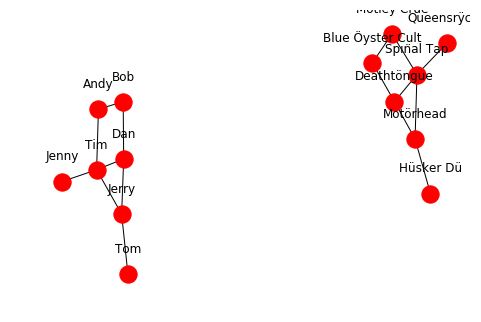

In [3]:
try:
    hd = 'H' + unichr(252) + 'sker D' + unichr(252)
    mh = 'Mot' + unichr(246) + 'rhead'
    mc = 'M' + unichr(246) + 'tley Cr' + unichr(252) + 'e'
    st = 'Sp' + unichr(305) + 'n' + unichr(776) + 'al Tap'
    q = 'Queensr' + unichr(255) + 'che'
    boc = 'Blue ' + unichr(214) + 'yster Cult'
    dt = 'Deatht' + unichr(246) + 'ngue'
except NameError:
    hd = 'H' + chr(252) + 'sker D' + chr(252)
    mh = 'Mot' + chr(246) + 'rhead'
    mc = 'M' + chr(246) + 'tley Cr' + chr(252) + 'e'
    st = 'Sp' + chr(305) + 'n' + chr(776) + 'al Tap'
    q = 'Queensr' + chr(255) + 'che'
    boc = 'Blue ' + chr(214) + 'yster Cult'
    dt = 'Deatht' + chr(246) + 'ngue'
    
G = nx.Graph()

G.add_edge(hd, mh)
G.add_edge(mc, st)
G.add_edge(boc, mc)
G.add_edge(boc, dt)
G.add_edge(st, dt)
G.add_edge(q, st)
G.add_edge(dt, mh)
G.add_edge(st, mh)

tom = 'Tom' # hd
jer = 'Jerry' # mh
andy = 'Andy' # mc
tim = 'Tim' # st
jen = 'Jenny' # q
bob = 'Bob' # boc
dan = 'Dan' # dt


G.add_edge(tom, jer)
G.add_edge(andy, tim)
G.add_edge(bob, andy)
G.add_edge(bob, dan)
G.add_edge(tim, dan)
G.add_edge(jen, tim)
G.add_edge(dan, jer)
G.add_edge(tim, jer)

pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=16, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.07
nx.draw_networkx_labels(G, pos)
plt.figure(figsize=(16,9))
plt.show()

In [3]:
graphs = list(nx.connected_component_subgraphs(G))

In [4]:
graphs[1]

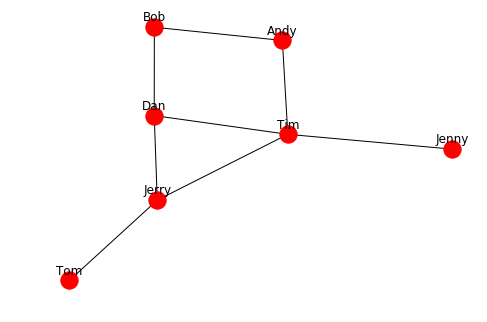

In [5]:
pos = nx.spring_layout(graphs[1])
nx.draw(graphs[1], pos, font_size=16, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.07
nx.draw_networkx_labels(graphs[1], pos)
plt.figure(figsize=(16,9))
plt.show()

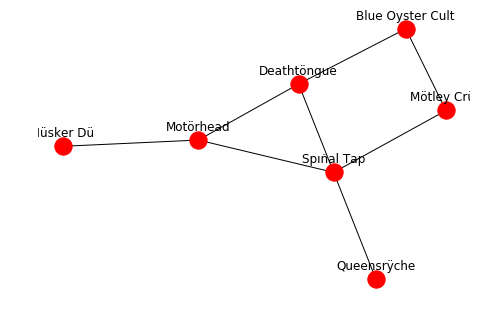

In [6]:
pos = nx.spring_layout(graphs[0])
nx.draw(graphs[0], pos, font_size=16, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.07
nx.draw_networkx_labels(graphs[0], pos)
plt.figure(figsize=(16,9))
plt.show()

In [4]:
GA = GraphicML.Attribute(G)
df = GA.mulTabular()
df.head()

Note: More than one connected components included.


,source,target,shortest_path_length,efficiency,jaccard_coefficient,resource_allocation_index,adamic_adar_index,preferential_attachment,degree_centrality_x,closeness_centrality_x,...,number_of_edges,number_of_selfloops,graph_number_of_cliques,graph_clique_number,density,transitivity,average_clustering,radius,is_tree,wiener_index
0,Motörhead,Queensrÿche,2,0.5,0.333333,0.250000,0.721348,3,0.5,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
1,Motörhead,Blue Öyster Cult,2,0.5,0.250000,0.333333,0.910239,6,0.5,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
2,Motörhead,Hüsker Dü,1,1.0,0.000000,0.000000,0.000000,3,0.5,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
3,Motörhead,Mötley Crüe,2,0.5,0.250000,0.250000,0.721348,6,0.5,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
4,Motörhead,Spın̈al Tap,1,1.0,0.166667,0.333333,0.910239,12,0.5,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0


In [5]:
df

,source,target,shortest_path_length,efficiency,jaccard_coefficient,resource_allocation_index,adamic_adar_index,preferential_attachment,degree_centrality_x,closeness_centrality_x,...,number_of_edges,number_of_selfloops,graph_number_of_cliques,graph_clique_number,density,transitivity,average_clustering,radius,is_tree,wiener_index
0,Motörhead,Queensrÿche,2,0.500000,0.333333,0.250000,0.721348,3,0.500000,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
1,Motörhead,Blue Öyster Cult,2,0.500000,0.250000,0.333333,0.910239,6,0.500000,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
2,Motörhead,Hüsker Dü,1,1.000000,0.000000,0.000000,0.000000,3,0.500000,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
3,Motörhead,Mötley Crüe,2,0.500000,0.250000,0.250000,0.721348,6,0.500000,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
4,Motörhead,Spın̈al Tap,1,1.000000,0.166667,0.333333,0.910239,12,0.500000,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
5,Motörhead,Deathtöngue,1,1.000000,0.200000,0.250000,0.721348,9,0.500000,0.666667,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
6,Queensrÿche,Blue Öyster Cult,3,0.333333,0.000000,0.000000,0.000000,2,0.166667,0.461538,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
7,Queensrÿche,Hüsker Dü,3,0.333333,0.000000,0.000000,0.000000,1,0.166667,0.461538,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
8,Queensrÿche,Mötley Crüe,2,0.500000,0.500000,0.250000,0.721348,2,0.166667,0.461538,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0
9,Queensrÿche,Spın̈al Tap,1,1.000000,0.000000,0.000000,0.000000,4,0.166667,0.461538,...,8,0,6,3,0.380952,0.214286,0.119048,2,0,38.0


In [7]:
df.density.unique()

array([0.38095238])